In [1]:
import tensorflow as tf
tf.config.set_visible_devices([], 'GPU') # comment me out on a computer with an GPU! 
from tensorflow import keras

2022-11-27 18:50:08.437350: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-27 18:50:08.806878: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-27 18:50:08.806940: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-27 18:50:09.772887: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

In [2]:
#!wget https://github.com/SVizor42/ML_Zoomcamp/releases/download/dino-dragon-model/dino_dragon_10_0.899.h5

In [4]:
!python3 -V

Python 3.10.6


In [5]:
tf.__version__

'2.11.0'

In [7]:
model = keras.models.load_model("dino_dragon_10_0.899.h5")

In [8]:
from tensorflow.keras.preprocessing.image import load_img

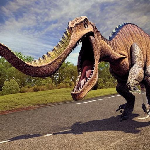

In [71]:
path = 'dino-dragon/train/dino'
name = '008809ec-c4a2-478e-a4c0-ea297f27a4dd.jpg'
fullname = f'{path}/{name}'
img = load_img(fullname, target_size = (150, 150))
img

In [12]:
from tensorflow.keras.applications.xception import preprocess_input

In [13]:
import numpy as np


In [23]:
x = np.array(img)
X = np.array([x])
X = preprocess_input(X)

In [25]:
preds = model.predict(X)

1/1 [==============================] - 0s 55ms/step


## Convert Keras to TF-Lite

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open('dino_dragon.tflite','wb') as f_out:
    f_out.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpiq57hh1d/assets


INFO:tensorflow:Assets written to: /tmp/tmpiq57hh1d/assets
2022-11-27 19:26:21.723591: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-11-27 19:26:21.723697: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-11-27 19:26:21.731310: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmpiq57hh1d
2022-11-27 19:26:21.732394: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2022-11-27 19:26:21.732415: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /tmp/tmpiq57hh1d
2022-11-27 19:26:21.743714: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:357] MLIR V1 optimization pass is not enabled
2022-11-27 19:26:21.744524: I tensorflow/cc/saved_model/loader.cc:229] Restoring SavedModel bundle.
2022-11-27 19:26:22.530754: I tensorflow/cc/saved_model/loader.cc:213] Running initializatio

In [28]:
import tensorflow.lite as tflite

In [ ]:
interpreter = tflite.Interpreter(model_path='dino_dragon.tflite')
interpreter.allocate_tensors()

In [33]:
input_index = interpreter.get_input_details()[0]['index']

In [65]:

output_index = interpreter.get_output_details()[0]['index']
output_index

13

In [36]:
interpreter.set_tensor(input_index, X)

In [37]:
interpreter.invoke()

In [39]:
preds = interpreter.get_tensor(output_index)

## Removing TF dependency

In [40]:
from PIL import Image

In [54]:
with Image.open(fullname) as img:
    img = img.resize((150, 150), Image.NEAREST)

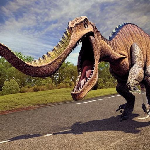

In [55]:
img

In [56]:
def preprocess_input(x):
    x /= 127.5
    x -= 1.0
    return x


In [57]:
x = np.array(img, dtype='float32')
X = np.array([x])
X = preprocess_input(X)

In [58]:
interpreter.set_tensor(input_index, X)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)

In [59]:
preds

array([[0.9999651]], dtype=float32)

## Simpler to do this

In [66]:
from io import BytesIO
from urllib import request

from PIL import Image

def download_image(url):
    with request.urlopen(url) as resp:
        buffer = resp.read()
    stream = BytesIO(buffer)
    img = Image.open(stream)
    return img


def prepare_image(img, target_size):
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img = img.resize(target_size, Image.NEAREST)
    return img

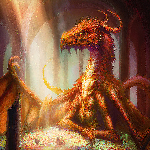

In [93]:
img = download_image('https://upload.wikimedia.org/wikipedia/commons/thumb/d/df/Smaug_par_David_Demaret.jpg/1280px-Smaug_par_David_Demaret.jpg')
img = prepare_image(img, (150,150))
img

In [79]:
x = np.array(img, dtype='float32')
X = np.array([x])
X = preprocess_input(X)

In [94]:
X.shape

(1, 150, 150, 3)

In [95]:
X[0,0,0,0]

0.105882406

In [96]:
interpreter.set_tensor(input_index, X)
interpreter.invoke()
preds = interpreter.get_tensor(output_index)

In [97]:
preds

array([[1.]], dtype=float32)